<a href="https://colab.research.google.com/github/rajeshkpandey/AWESOME-FER/blob/master/Epidemics_ABM_python_latest_viral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

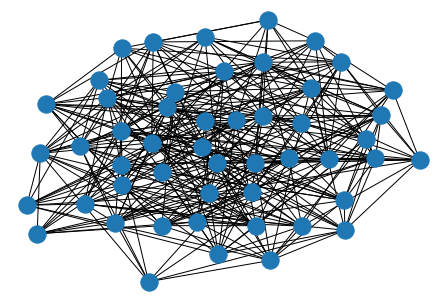

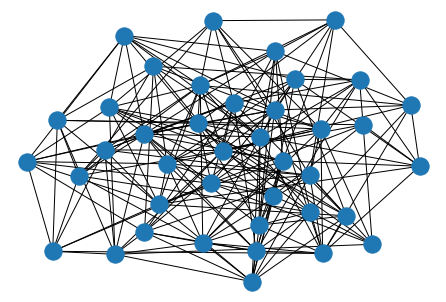

In [1]:
#Erdos-Renyi Graph in Networkx
import random
import copy
from networkx import nx
import matplotlib.pyplot as plt

N = 50  # 50 Indian Cities
K = 100000  # 10000 Agents(people under observation on SIR modeling)
#M = 30  # 30 Edges
NN = 40 # 40 nodes (contact places) of Cities


#Graph = nx.gnm_random_graph(N, M)

P = .3      #Probabibilty for Node Connection in random graph
PP = .3
Graph = nx.erdos_renyi_graph(N,P) # Use Networkx to generate a random graph of N nodes being connected with probability P.
GraphN = nx.erdos_renyi_graph(NN,PP)


nx.draw(Graph)
plt.show()
nx.draw(GraphN)
plt.show()

In [2]:
A = nx.adjacency_matrix(Graph)
Adjacency_matrix = A.todense()
AN = nx.adjacency_matrix(GraphN)
Adjacency_matrixN = AN.todense()
print(Adjacency_matrix)
print(Adjacency_matrixN)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 1 1 ... 0 0 0]
 [0 0 0 ... 1 0 0]]
[[0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 1 0 0]
 ...
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [3]:
#Empty Node Dictionary [ A Dictionary consisting list of agent states on Graph Nodes]
Node = {}
print(Node)
for i in range(N):
  for j in range(NN):
    Node[i*NN+j] = list()
#print(Node)
print(len(Node))


{}
2000


In [4]:
#Adding Viral_Index Randomly
for i in range(N):
  for j in range(NN):
    Viral_load=0
    Node[i*NN+j].append({'Viral_load' : Viral_load})
    Node[i*NN+j].append({'S' : 0})
    Node[i*NN+j].append({'I' : 0})
    Node[i*NN+j].append({'R' : 0})
#print(Node)
print(len(Node))


2000


In [5]:
#Initailizing randomly infection state [0 shows Susceptible, 1 shows Infected, and 2 shows Recovered]
Agent = {}
for k in range(K):
  Agent[k] = list() 
for k in range(K):
  Rand_node=random.randint(0,N-1)
  Neighbors = list(Graph.neighbors(Rand_node))
  Rand_nodeN=random.randint(0,NN-1)
  First_nodeN = random.randint(0,NN-1)
  Second_nodeN = random.randint(0,NN-1)
  Rand_state=random.choices([0,1],weights=(98,2),k=1)[0]
  Rand_neighbors = list(GraphN.neighbors(Rand_nodeN))
  Rand_neighbors1 = list(GraphN.neighbors(First_nodeN))
  Rand_neighbors2 = list(GraphN.neighbors(Second_nodeN))
  if len(Rand_neighbors) > 0:
    Rand_nodeN1=random.choice(Rand_neighbors)
    Rand_neighbors.remove(Rand_nodeN1)
  else:
    Rand_nodeN1=Rand_nodeN
  
  if len(Rand_neighbors) > 0:
    Rand_nodeN2=random.choice(Rand_neighbors)
    Rand_neighbors.remove(Rand_nodeN2)
    if Rand_nodeN2 not in list(GraphN.neighbors(Rand_nodeN1)):
      Rand_nodeN2=Rand_nodeN1
  else:
    Rand_nodeN2=Rand_nodeN1
  
  if Rand_state == 0:
    Node[Rand_node*NN+Rand_nodeN][1]['S']+=1
    Node[Rand_node*NN+Rand_nodeN].append({k : Rand_state})
    Agent[k].append({'State' : Rand_state})
  elif Rand_state == 1:
    Node[Rand_node*NN+Rand_nodeN][2]['I']+=1
    Node[Rand_node*NN+Rand_nodeN].append({k : Rand_state, 'V_l' : 1})
    Agent[k].append({'State' : Rand_state, 'V_l' : 1 })
  else:
    Node[Rand_node*NN+Rand_nodeN][3]['R']+=1
    Node[Rand_node*NN+Rand_nodeN].append({k : Rand_state})
    Agent[k].append({'State' : Rand_state})

  Agent[k].append({'Home_node' : Rand_node})
  Agent[k].append({'Home_nodeN' : [Rand_nodeN, Rand_nodeN1, Rand_nodeN2]})
  
  if len(Neighbors) > 0:
    First_node = random.choice(Neighbors)
    Neighbors.remove(First_node)
  else:
    First_node = Rand_node
  if len(Neighbors) > 0:
    Second_node = random.choice(Neighbors)
  else:
    Second_node = Rand_node

  if len(Rand_neighbors1) > 0:
    First_nodeN1=random.choice(Rand_neighbors1)
    Rand_neighbors1.remove(First_nodeN1)
  else:
    First_nodeN1=First_nodeN
  
  if len(Rand_neighbors1) > 0:
    First_nodeN2=random.choice(Rand_neighbors1)
    Rand_neighbors1.remove(First_nodeN2)
    if First_nodeN2 not in list(GraphN.neighbors(First_nodeN1)):
      First_nodeN2=First_nodeN1
  else:
    First_nodeN2=First_nodeN1

  if len(Rand_neighbors2) > 0:
    Second_nodeN1=random.choice(Rand_neighbors2)
    Rand_neighbors2.remove(Second_nodeN1)
  else:
    Second_nodeN1=Second_nodeN
  
  if len(Rand_neighbors2) > 0:
    Second_nodeN2=random.choice(Rand_neighbors2)
    Rand_neighbors2.remove(Second_nodeN2)
    if Second_nodeN2 not in list(GraphN.neighbors(Second_nodeN1)):
      Second_nodeN2=Second_nodeN1
  else:
    Second_nodeN2=Second_nodeN1

  Agent[k].append({'First_node' : First_node})
  Agent[k].append({'First_nodeN' : [First_nodeN, First_nodeN1, First_nodeN2]})
  Agent[k].append({'Second_node' : Second_node})
  Agent[k].append({'Second_nodeN' : [Second_nodeN, Second_nodeN1, Second_nodeN2]})
  Agent[k].append({'Current_node' : Rand_node})
  Agent[k].append({'Current_nodeN' : [Rand_nodeN, Rand_nodeN1, Rand_nodeN2]})
#print(Node)
#print(Agent)

In [6]:
print(len(Graph.nodes))
print(len(GraphN.nodes))

50
40


In [7]:
#Random Walk Implementation
def random_walk(Graph=Graph, GraphN=GraphN, Node=Node, Agent=Agent, num_walks=1, num_steps=1):
    walks = list()
    Node_next = {}
    Agent_next = {}
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        Node_next[i*len(GraphN.nodes)+j] = list() 
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        Node_next[i*len(GraphN.nodes)+j].append({'Viral_load' : copy.deepcopy(Node[i*len(GraphN.nodes)+j][0]['Viral_load'])})
        Node_next[i*len(GraphN.nodes)+j].append({'S' : 0})
        Node_next[i*len(GraphN.nodes)+j].append({'I' : 0})
        Node_next[i*len(GraphN.nodes)+j].append({'R' : 0})
    for i in range(len(Agent)):
      Agent_next[i] = list()
    Agent_next = copy.deepcopy(Agent)
    count_nomove=0
    count_move_first=0
    count_move_second=0
    count_stay_home=0
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        for agent in list(range(4,len(Node[i*len(GraphN.nodes)+j]))):
          a_id = list(Node[i*len(GraphN.nodes)+j][agent].keys())[0]
          #print(a_id)
          #print(Agent[a_id])
          for walk in range(num_walks):
              curr_walk = [i*len(GraphN.nodes)+j]
              cur = i*len(GraphN.nodes)+j
              for step in range(num_steps):
                  neighbors = []
                  neighbors.append(Agent_next[a_id][1]['Home_node'])
                  neighbors.append(Agent_next[a_id][3]['First_node'])
                  neighbors.append(Agent_next[a_id][5]['Second_node'])

                  if len(neighbors) > 0:  
                      I1=(Node[Agent_next[a_id][4]['First_nodeN'][0]][2]['I'] +  Node[Agent_next[a_id][4]['First_nodeN'][1]][2]['I'] + Node[Agent_next[a_id][4]['First_nodeN'][2]][2]['I'])
                      I2=(Node[Agent_next[a_id][6]['Second_nodeN'][0]][2]['I'] +  Node[Agent_next[a_id][6]['Second_nodeN'][1]][2]['I'] + Node[Agent_next[a_id][6]['Second_nodeN'][2]][2]['I'])
                      IH=(Node[Agent_next[a_id][2]['Home_nodeN'][0]][2]['I'] +  Node[Agent_next[a_id][2]['Home_nodeN'][1]][2]['I'] + Node[Agent_next[a_id][2]['Home_nodeN'][2]][2]['I'])
                      V1 = (Node[Agent_next[a_id][4]['First_nodeN'][0]][0]['Viral_load'] + Node[Agent_next[a_id][4]['First_nodeN'][1]][0]['Viral_load'] + Node[Agent_next[a_id][4]['First_nodeN'][2]][0]['Viral_load'])
                      V2 = (Node[Agent_next[a_id][6]['Second_nodeN'][0]][0]['Viral_load'] + Node[Agent_next[a_id][6]['Second_nodeN'][1]][0]['Viral_load'] + Node[Agent_next[a_id][6]['Second_nodeN'][2]][0]['Viral_load'])
                      VH = (Node[Agent_next[a_id][2]['Home_nodeN'][0]][0]['Viral_load'] + Node[Agent_next[a_id][2]['Home_nodeN'][1]][0]['Viral_load'] + Node[Agent_next[a_id][2]['Home_nodeN'][2]][0]['Viral_load'])
                      P1 = I1/(I1**2 + .01) + V1/(V1**2+.01)
                      P2 = I2/(I2**2 + .01) + V2/(V2**2+.01)
                      PH = IH/(IH**2 + .01) + VH/(VH**2+.01)
                      P = P1 + P2 + PH                      
                      if P == 0:
                        PNN1 = 1
                        PNN2 = 0
                        PNN3 = 0
                      else:
                        PNN1 = PH/P 
                        PNN2 = P1/P
                        PNN3 = P2/P 
                      next = random.choices(neighbors,weights=(PNN1,PNN2,PNN3), k=1)[0] 
                      if next == Agent_next[a_id][7]['Current_node']:
                        #print("no movement")
                        count_nomove+=1

                      else:
                        if next == Agent_next[a_id][3]['First_node']:
                          Agent_next[a_id][7]['Current_node'] = Agent_next[a_id][3]['First_node']
                          Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][4]['First_nodeN'][0]
                          Agent_next[a_id][8]['Current_nodeN'][1] = Agent_next[a_id][4]['First_nodeN'][1]
                          Agent_next[a_id][8]['Current_nodeN'][2] = Agent_next[a_id][4]['First_nodeN'][2]
                          count_move_first+=1
                        elif next == Agent_next[a_id][5]['Second_node']:
                          Agent_next[a_id][7]['Current_node'] = Agent_next[a_id][5]['Second_node']
                          Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][6]['Second_nodeN'][0]
                          Agent_next[a_id][8]['Current_nodeN'][1] = Agent_next[a_id][6]['Second_nodeN'][1]
                          Agent_next[a_id][8]['Current_nodeN'][2] = Agent_next[a_id][6]['Second_nodeN'][2]
                          count_move_second+=1
                        elif next == Agent_next[a_id][1]['Home_node']:
                          Agent_next[a_id][7]['Current_node'] = Agent_next[a_id][1]['Home_node']
                          Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][2]['Home_nodeN'][0]
                          Agent_next[a_id][8]['Current_nodeN'][1] = Agent_next[a_id][2]['Home_nodeN'][1]
                          Agent_next[a_id][8]['Current_nodeN'][2] = Agent_next[a_id][2]['Home_nodeN'][2]
                          count_stay_home+=1
                      I2 = Node[Agent_next[a_id][8]['Current_nodeN'][1]][2]['I']
                      I3 = Node[Agent_next[a_id][8]['Current_nodeN'][2]][2]['I']
                      I1 = Node[Agent_next[a_id][8]['Current_nodeN'][0]][2]['I']
                      V2 = Node[Agent_next[a_id][8]['Current_nodeN'][1]][0]['Viral_load']
                      V3 = Node[Agent_next[a_id][8]['Current_nodeN'][2]][0]['Viral_load']
                      V1 = Node[Agent_next[a_id][8]['Current_nodeN'][0]][0]['Viral_load']
                      P2 = I2/(I2**2 + .01) + V2/(V2**2+.01)
                      P3 = I3/(I3**2 + .01) + V3/(V3**2+.01)
                      P1 = I1/(I1**2 + .01) + V1/(V1**2+.01)
                      P = P1+P2+P3
                      if P == 0:
                        PNN1 = 1
                        PNN2 = 0
                        PNN3 = 0
                      else:
                        PNN1=P1/P
                        PNN2=P2/P
                        PNN3=P3/P
                       
                      nextn = random.choices(Agent_next[a_id][8]['Current_nodeN'],weights=(PNN1,PNN2,PNN3),k=1)[0]
                      if nextn == Agent_next[a_id][8]['Current_nodeN'][1]:
                        Agent_next[a_id][8]['Current_nodeN'][1],Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][8]['Current_nodeN'][0],Agent_next[a_id][8]['Current_nodeN'][1]
                      elif nextn == Agent_next[a_id][8]['Current_nodeN'][2] :
                        Agent_next[a_id][8]['Current_nodeN'][2],Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][8]['Current_nodeN'][0],Agent_next[a_id][8]['Current_nodeN'][2]
                      else:
                        Agent_next[a_id][8]['Current_nodeN'][0]=Agent_next[a_id][8]['Current_nodeN'][0]                      
                  nex = next*len(GraphN.nodes)+nextn
          Node_next[nex].append(copy.deepcopy(Node[cur][agent]))
          if Node[cur][agent][a_id] == 0:
            Node_next[nex][1]['S']+=1
          elif Node[cur][agent][a_id] == 1:
            Node_next[nex][2]['I']+=1
            Node_next[nex][-1]['V_l']/=2
            #if nex != cur:
            #  Node_next[cur][0]['Viral_load']+=1
          elif Node[cur][agent][a_id] == 2:
            Node_next[nex][3]['R']+=1

          curr_walk.append(nex)
          walks.append(nex)

    #print(Node_next)
    #print(Agent_next)

    #State-transition-logic
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        count_SI=0
        count_IR=0
        W1 = Node_next[i*len(GraphN.nodes)+j][2]['I'] + Node_next[i*len(GraphN.nodes)+j][0]['Viral_load']
        W2 = Node_next[i*len(GraphN.nodes)+j][1]['S'] + Node_next[i*len(GraphN.nodes)+j][3]['R'] - 1
        for agent in list(range(4,len(Node_next[i*len(GraphN.nodes)+j]))):
          a_id = list(Node_next[i*len(GraphN.nodes)+j][agent].keys())[0]
          if Node_next[i*len(GraphN.nodes)+j][agent][a_id] == 0:
            Node_next[i*len(GraphN.nodes)+j][agent][a_id] = random.choices([1,0], weights=(W1,W2), k=1)[0] 
            if Node_next[i*len(GraphN.nodes)+j][agent][a_id] == 1:
              count_SI+=1
              Node_next[i*len(GraphN.nodes)+j][agent].update({'V_l' : 1})
              Agent_next[a_id][0]['State'] = 1
          elif Node_next[i*len(GraphN.nodes)+j][agent][a_id] == 1:
            if Node_next[i*len(GraphN.nodes)+j][agent]['V_l'] <= .0625:
              Node_next[i*len(GraphN.nodes)+j][agent][a_id] = 2
              count_IR+=1
              Agent_next[a_id][0]['State'] = 2
              Node_next[i*len(GraphN.nodes)+j][agent].pop('V_l') 
        Node_next[i*len(GraphN.nodes)+j][1]['S']-=count_SI
        Node_next[i*len(GraphN.nodes)+j][2]['I']+=(count_SI - count_IR)
        Node_next[i*len(GraphN.nodes)+j][3]['R']+=count_IR 
         
    #print("count_no_movements",count_nomove)
    #print("count_movements_firstnode",count_move_first)
    #print("count_movements_secondnode",count_move_second)
    #print("count_stay_homenode",count_stay_home) 

    return Node,Node_next,Agent,Agent_next

In [8]:
def Count_SIR_Node(Node=Node):
  count_S=0
  count_I=0
  count_R=0
  total_V=0.0
  for i in range(len(Node)):
    count_S+=Node[i][1]['S'] 
    count_I+=Node[i][2]['I']
    count_R+=Node[i][3]['R'] 
    total_V+=Node[i][0]['Viral_load']
  return count_S,count_I,count_R,total_V

In [9]:
def Count_SIR_Agent(Agent=Agent):
  count_S=0
  count_I=0
  count_R=0
  for i in range(len(Agent)):
    if Agent[i][0]['State'] == 0:
      count_S+=1
    elif Agent[i][0]['State'] == 1:
      count_I+=1
    elif Agent[i][0]['State'] == 2:
      count_R+=1
  return count_S,count_I,count_R 

[98003, 96024, 92327, 85355, 73028, 55021, 32696, 13481, 4269, 1716, 1068, 924, 872, 862, 857, 856, 856, 856, 856, 856]
[1997, 3976, 7673, 14645, 24975, 41003, 59631, 71874, 68759, 53305, 31628, 12557, 3397, 854, 211, 68, 16, 6, 1, 0]
[0, 0, 0, 0, 1997, 3976, 7673, 14645, 26972, 44979, 67304, 86519, 95731, 98284, 98932, 99076, 99128, 99138, 99143, 99144]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[[], [98003, 96024, 92327, 85355, 73028, 55021, 32696, 13481, 4269, 1716, 1068, 924, 872, 862, 857, 856, 856, 856, 856, 856]]
[[], [1997, 3976, 7673, 14645, 24975, 41003, 59631, 71874, 68759, 53305, 31628, 12557, 3397, 854, 211, 68, 16, 6, 1, 0]]
[[], [0, 0, 0, 0, 1997, 3976, 7673, 14645, 26972, 44979, 67304, 86519, 95731, 98284, 98932, 99076, 99128, 99138, 99143, 99144]]
[[], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]


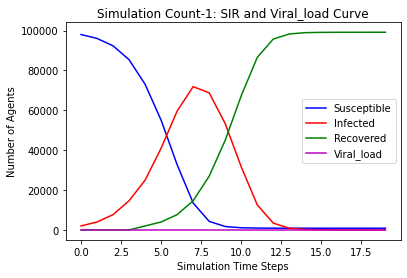

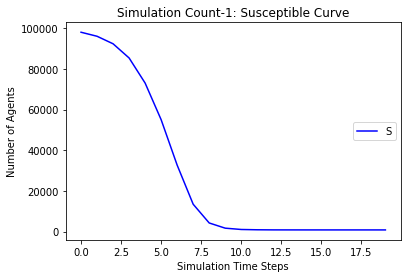

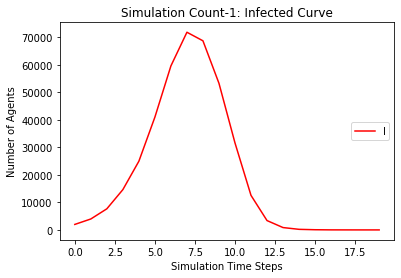

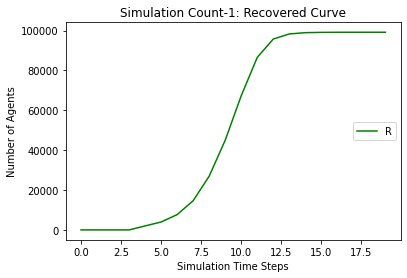

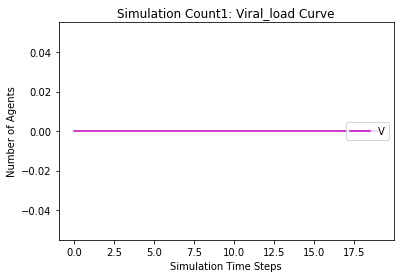

[98003, 96036, 92219, 85201, 72682, 54326, 31860, 12763, 3573, 1219, 699, 548, 495, 490, 489, 486, 486, 486, 486, 486]
[1997, 3964, 7781, 14799, 25321, 41710, 60359, 72438, 69109, 53107, 31161, 12215, 3078, 729, 210, 62, 9, 4, 3, 0]
[0, 0, 0, 0, 1997, 3964, 7781, 14799, 27318, 45674, 68140, 87237, 96427, 98781, 99301, 99452, 99505, 99510, 99511, 99514]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[[], [98003, 96024, 92327, 85355, 73028, 55021, 32696, 13481, 4269, 1716, 1068, 924, 872, 862, 857, 856, 856, 856, 856, 856], [98003, 96036, 92219, 85201, 72682, 54326, 31860, 12763, 3573, 1219, 699, 548, 495, 490, 489, 486, 486, 486, 486, 486]]
[[], [1997, 3976, 7673, 14645, 24975, 41003, 59631, 71874, 68759, 53305, 31628, 12557, 3397, 854, 211, 68, 16, 6, 1, 0], [1997, 3964, 7781, 14799, 25321, 41710, 60359, 72438, 69109, 53107, 31161, 12215, 3078, 729, 210, 62, 9, 4, 3, 0]]
[[], [0, 0, 0, 0, 1997, 3976, 7673, 14645, 26972, 44979, 67304

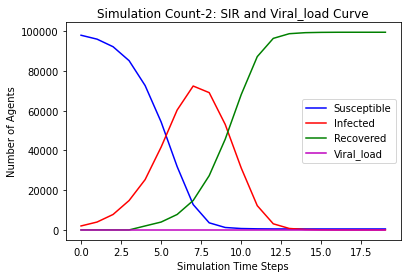

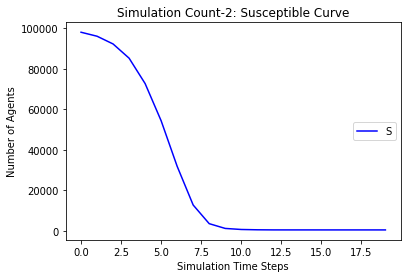

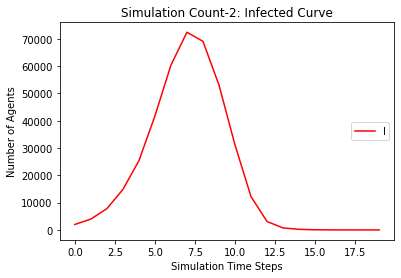

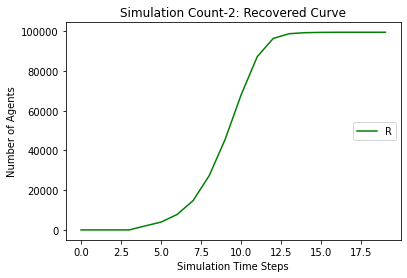

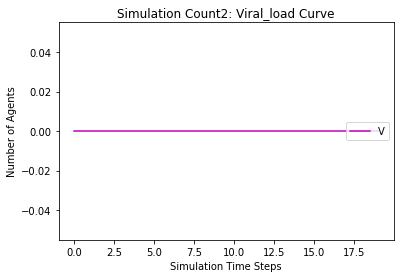

[98003, 95998, 92195, 84910, 72120, 53659, 31101, 12356, 3626, 1314, 767, 634, 599, 591, 587, 586, 586, 586, 586, 586]
[1997, 4002, 7805, 15090, 25883, 42339, 61094, 72554, 68494, 52345, 30334, 11722, 3027, 723, 180, 48, 13, 5, 1, 0]
[0, 0, 0, 0, 1997, 4002, 7805, 15090, 27880, 46341, 68899, 87644, 96374, 98686, 99233, 99366, 99401, 99409, 99413, 99414]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[[], [98003, 96024, 92327, 85355, 73028, 55021, 32696, 13481, 4269, 1716, 1068, 924, 872, 862, 857, 856, 856, 856, 856, 856], [98003, 96036, 92219, 85201, 72682, 54326, 31860, 12763, 3573, 1219, 699, 548, 495, 490, 489, 486, 486, 486, 486, 486], [98003, 95998, 92195, 84910, 72120, 53659, 31101, 12356, 3626, 1314, 767, 634, 599, 591, 587, 586, 586, 586, 586, 586]]
[[], [1997, 3976, 7673, 14645, 24975, 41003, 59631, 71874, 68759, 53305, 31628, 12557, 3397, 854, 211, 68, 16, 6, 1, 0], [1997, 3964, 7781, 14799, 25321, 41710, 60359, 72438, 69

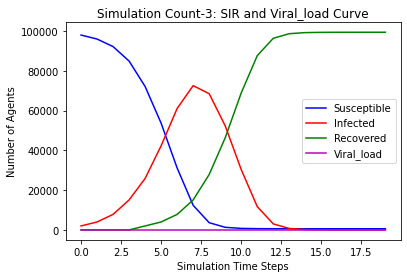

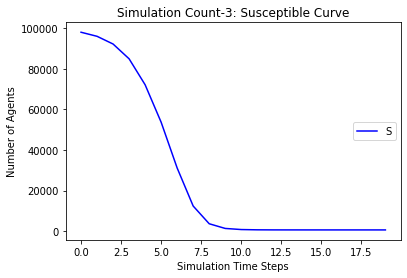

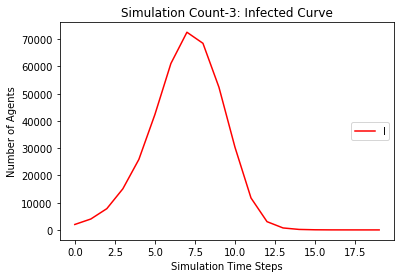

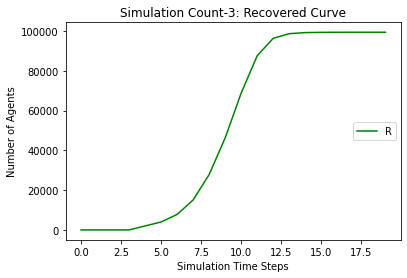

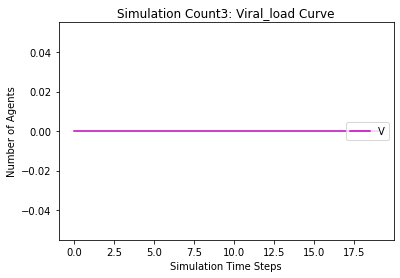

[98003, 96114, 92496, 85535, 73227, 55399, 33013, 13510, 4074, 1595, 1029, 867, 829, 819, 813, 812, 811, 811, 811, 811, 811]
[1997, 3886, 7504, 14465, 24776, 40715, 59483, 72025, 69153, 53804, 31984, 12643, 3245, 776, 216, 55, 18, 8, 2, 1, 0]
[0, 0, 0, 0, 1997, 3886, 7504, 14465, 26773, 44601, 66987, 86490, 95926, 98405, 98971, 99133, 99171, 99181, 99187, 99188, 99189]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[[], [98003, 96024, 92327, 85355, 73028, 55021, 32696, 13481, 4269, 1716, 1068, 924, 872, 862, 857, 856, 856, 856, 856, 856], [98003, 96036, 92219, 85201, 72682, 54326, 31860, 12763, 3573, 1219, 699, 548, 495, 490, 489, 486, 486, 486, 486, 486], [98003, 95998, 92195, 84910, 72120, 53659, 31101, 12356, 3626, 1314, 767, 634, 599, 591, 587, 586, 586, 586, 586, 586], [98003, 96114, 92496, 85535, 73227, 55399, 33013, 13510, 4074, 1595, 1029, 867, 829, 819, 813, 812, 811, 811, 811, 811, 811]]
[[], [1997, 3976, 7673, 14645,

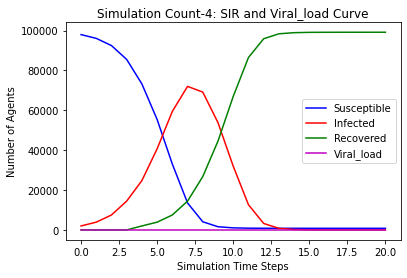

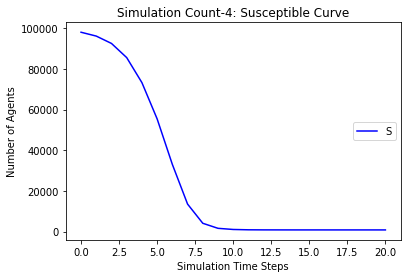

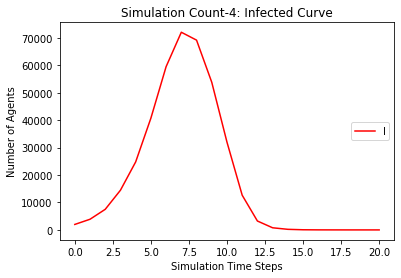

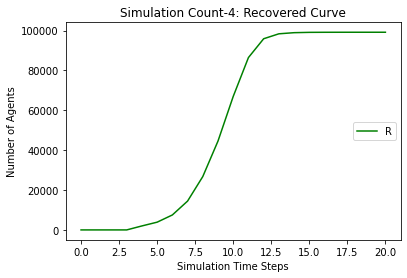

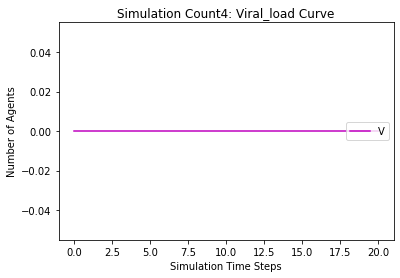

[98003, 96045, 92381, 85370, 73080, 54917, 32707, 13729, 4437, 1928, 1396, 1243, 1207, 1198, 1188, 1185, 1185, 1185, 1184, 1184, 1184, 1184, 1184]
[1997, 3955, 7619, 14630, 24923, 41128, 59674, 71641, 68643, 52989, 31311, 12486, 3230, 730, 208, 58, 22, 13, 4, 1, 1, 1, 0]
[0, 0, 0, 0, 1997, 3955, 7619, 14630, 26920, 45083, 67293, 86271, 95563, 98072, 98604, 98757, 98793, 98802, 98812, 98815, 98815, 98815, 98816]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[[], [98003, 96024, 92327, 85355, 73028, 55021, 32696, 13481, 4269, 1716, 1068, 924, 872, 862, 857, 856, 856, 856, 856, 856], [98003, 96036, 92219, 85201, 72682, 54326, 31860, 12763, 3573, 1219, 699, 548, 495, 490, 489, 486, 486, 486, 486, 486], [98003, 95998, 92195, 84910, 72120, 53659, 31101, 12356, 3626, 1314, 767, 634, 599, 591, 587, 586, 586, 586, 586, 586], [98003, 96114, 92496, 85535, 73227, 55399, 33013, 13510, 4074, 1595, 1029, 867, 829, 819, 813, 812, 811

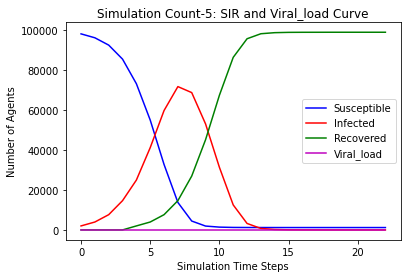

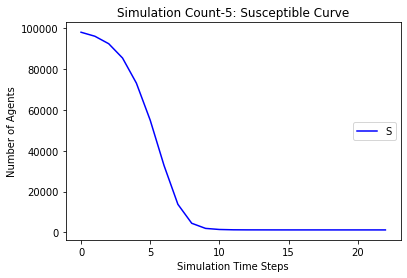

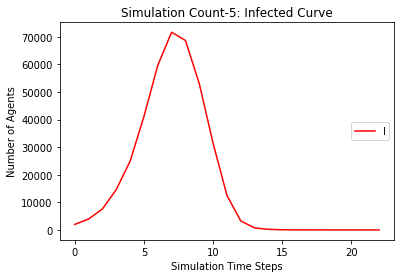

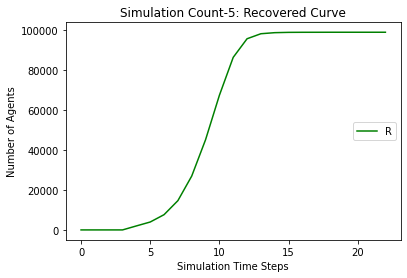

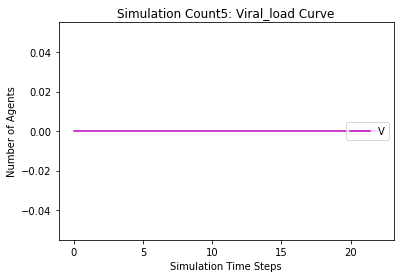

[98003, 96091, 92351, 85189, 72624, 54266, 31802, 12701, 3619, 1179, 578, 435, 396, 386, 382, 382, 382, 382, 382]
[1997, 3909, 7649, 14811, 25379, 41825, 60549, 72488, 69005, 53087, 31224, 12266, 3223, 793, 196, 53, 14, 4, 0]
[0, 0, 0, 0, 1997, 3909, 7649, 14811, 27376, 45734, 68198, 87299, 96381, 98821, 99422, 99565, 99604, 99614, 99618]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[[], [98003, 96024, 92327, 85355, 73028, 55021, 32696, 13481, 4269, 1716, 1068, 924, 872, 862, 857, 856, 856, 856, 856, 856], [98003, 96036, 92219, 85201, 72682, 54326, 31860, 12763, 3573, 1219, 699, 548, 495, 490, 489, 486, 486, 486, 486, 486], [98003, 95998, 92195, 84910, 72120, 53659, 31101, 12356, 3626, 1314, 767, 634, 599, 591, 587, 586, 586, 586, 586, 586], [98003, 96114, 92496, 85535, 73227, 55399, 33013, 13510, 4074, 1595, 1029, 867, 829, 819, 813, 812, 811, 811, 811, 811, 811], [98003, 96045, 92381, 85370, 73080, 54917, 32707, 13729, 4437, 1928, 13

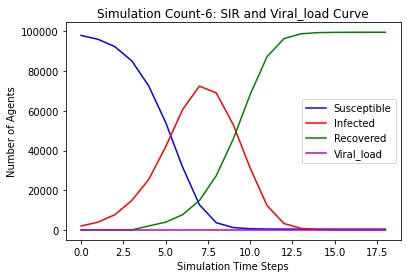

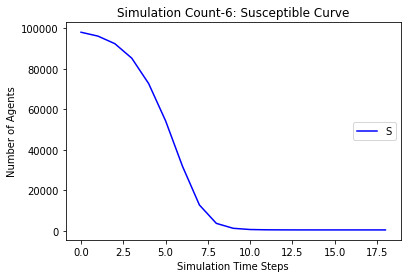

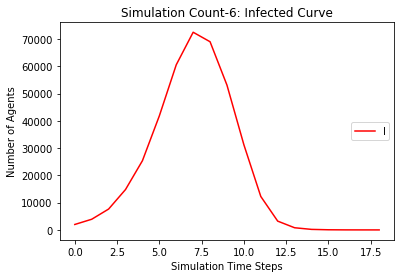

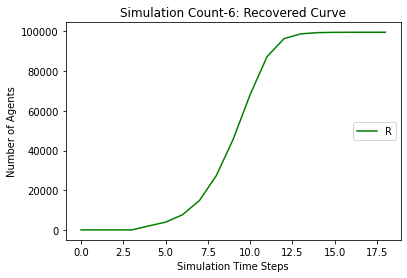

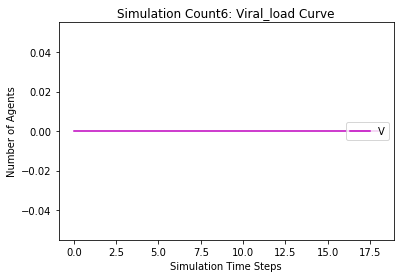

[98003, 96017, 92208, 85116, 72561, 54278, 31785, 12928, 3877, 1481, 819, 661, 612, 591, 585, 584, 584, 584, 584, 584]
[1997, 3983, 7792, 14884, 25442, 41739, 60423, 72188, 68684, 52797, 30966, 12267, 3265, 890, 234, 77, 28, 7, 1, 0]
[0, 0, 0, 0, 1997, 3983, 7792, 14884, 27439, 45722, 68215, 87072, 96123, 98519, 99181, 99339, 99388, 99409, 99415, 99416]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[[], [98003, 96024, 92327, 85355, 73028, 55021, 32696, 13481, 4269, 1716, 1068, 924, 872, 862, 857, 856, 856, 856, 856, 856], [98003, 96036, 92219, 85201, 72682, 54326, 31860, 12763, 3573, 1219, 699, 548, 495, 490, 489, 486, 486, 486, 486, 486], [98003, 95998, 92195, 84910, 72120, 53659, 31101, 12356, 3626, 1314, 767, 634, 599, 591, 587, 586, 586, 586, 586, 586], [98003, 96114, 92496, 85535, 73227, 55399, 33013, 13510, 4074, 1595, 1029, 867, 829, 819, 813, 812, 811, 811, 811, 811, 811], [98003, 96045, 92381, 85370, 73080, 54917, 32707, 1

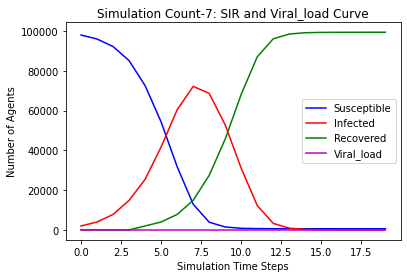

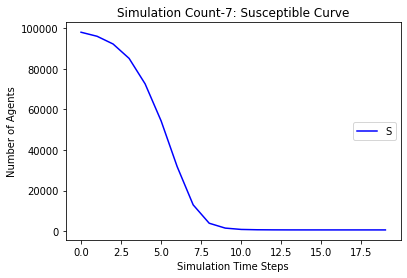

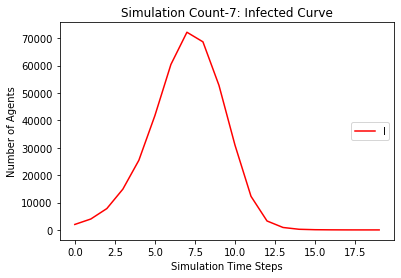

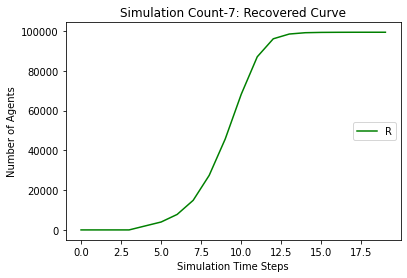

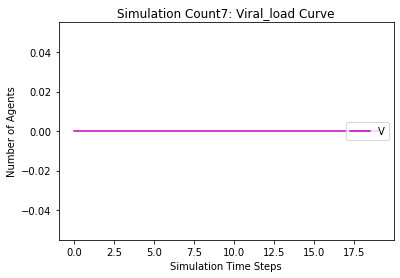

[98003, 96115, 92359, 85370, 73081, 55250, 32837, 13621, 3992, 1394, 766, 587, 533, 520, 518, 516, 515, 515, 515, 515, 515]
[1997, 3885, 7641, 14630, 24922, 40865, 59522, 71749, 69089, 53856, 32071, 13034, 3459, 874, 248, 71, 18, 5, 3, 1, 0]
[0, 0, 0, 0, 1997, 3885, 7641, 14630, 26919, 44750, 67163, 86379, 96008, 98606, 99234, 99413, 99467, 99480, 99482, 99484, 99485]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[[], [98003, 96024, 92327, 85355, 73028, 55021, 32696, 13481, 4269, 1716, 1068, 924, 872, 862, 857, 856, 856, 856, 856, 856], [98003, 96036, 92219, 85201, 72682, 54326, 31860, 12763, 3573, 1219, 699, 548, 495, 490, 489, 486, 486, 486, 486, 486], [98003, 95998, 92195, 84910, 72120, 53659, 31101, 12356, 3626, 1314, 767, 634, 599, 591, 587, 586, 586, 586, 586, 586], [98003, 96114, 92496, 85535, 73227, 55399, 33013, 13510, 4074, 1595, 1029, 867, 829, 819, 813, 812, 811, 811, 811, 811, 811], [98003, 96045, 92381, 85370, 73

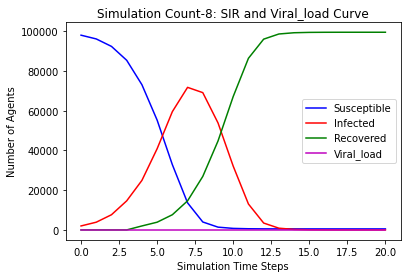

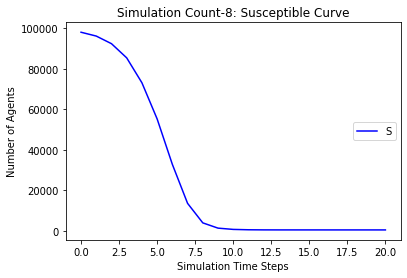

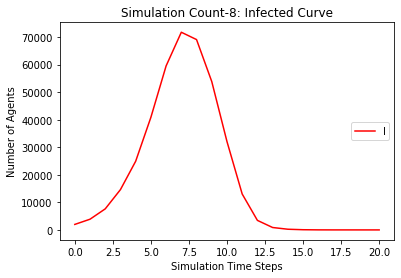

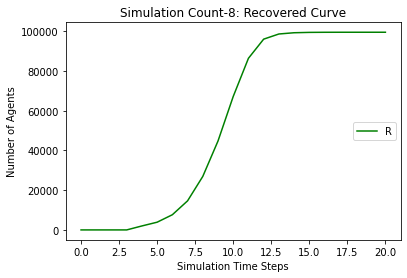

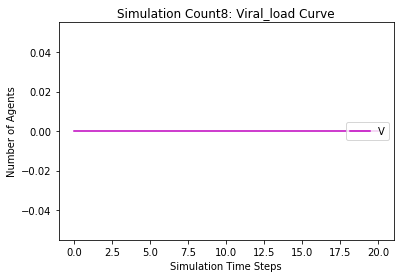

[98003, 96014, 92231, 85137, 72422, 54020, 31461, 12426, 3487, 1165, 605, 458, 430, 423, 422, 420, 420, 420, 420, 420]
[1997, 3986, 7769, 14863, 25581, 41994, 60770, 72711, 68935, 52855, 30856, 11968, 3057, 742, 183, 38, 10, 3, 2, 0]
[0, 0, 0, 0, 1997, 3986, 7769, 14863, 27578, 45980, 68539, 87574, 96513, 98835, 99395, 99542, 99570, 99577, 99578, 99580]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[[], [98003, 96024, 92327, 85355, 73028, 55021, 32696, 13481, 4269, 1716, 1068, 924, 872, 862, 857, 856, 856, 856, 856, 856], [98003, 96036, 92219, 85201, 72682, 54326, 31860, 12763, 3573, 1219, 699, 548, 495, 490, 489, 486, 486, 486, 486, 486], [98003, 95998, 92195, 84910, 72120, 53659, 31101, 12356, 3626, 1314, 767, 634, 599, 591, 587, 586, 586, 586, 586, 586], [98003, 96114, 92496, 85535, 73227, 55399, 33013, 13510, 4074, 1595, 1029, 867, 829, 819, 813, 812, 811, 811, 811, 811, 811], [98003, 96045, 92381, 85370, 73080, 54917, 32707, 1

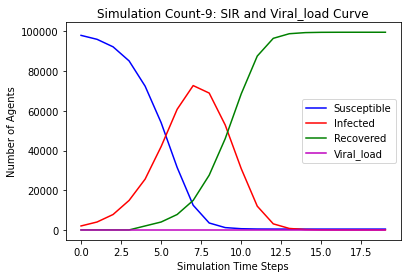

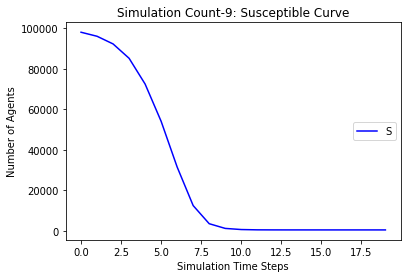

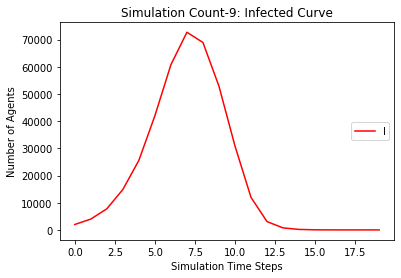

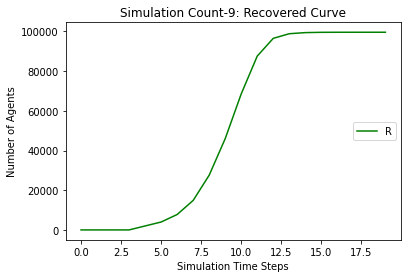

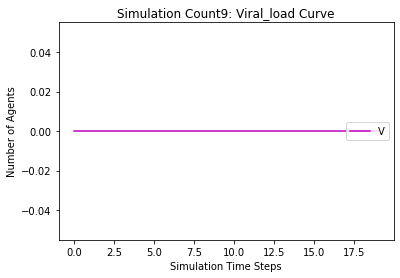

[98003, 96007, 92209, 85093, 72469, 54107, 31447, 12571, 3708, 1350, 769, 617, 567, 557, 554, 553, 553, 553, 553, 553]
[1997, 3993, 7791, 14907, 25534, 41900, 60762, 72522, 68761, 52757, 30678, 11954, 3141, 793, 215, 64, 14, 4, 1, 0]
[0, 0, 0, 0, 1997, 3993, 7791, 14907, 27531, 45893, 68553, 87429, 96292, 98650, 99231, 99383, 99433, 99443, 99446, 99447]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[[], [98003, 96024, 92327, 85355, 73028, 55021, 32696, 13481, 4269, 1716, 1068, 924, 872, 862, 857, 856, 856, 856, 856, 856], [98003, 96036, 92219, 85201, 72682, 54326, 31860, 12763, 3573, 1219, 699, 548, 495, 490, 489, 486, 486, 486, 486, 486], [98003, 95998, 92195, 84910, 72120, 53659, 31101, 12356, 3626, 1314, 767, 634, 599, 591, 587, 586, 586, 586, 586, 586], [98003, 96114, 92496, 85535, 73227, 55399, 33013, 13510, 4074, 1595, 1029, 867, 829, 819, 813, 812, 811, 811, 811, 811, 811], [98003, 96045, 92381, 85370, 73080, 54917, 32707, 1

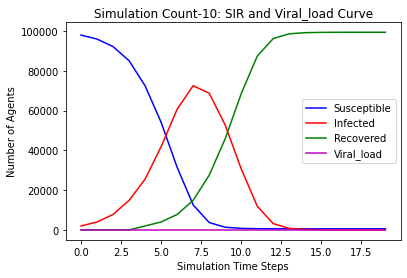

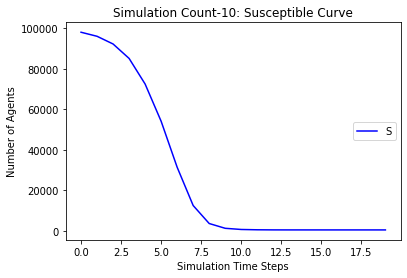

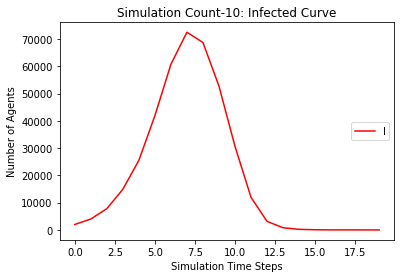

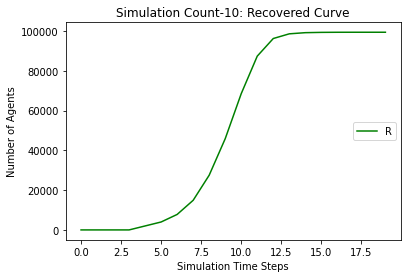

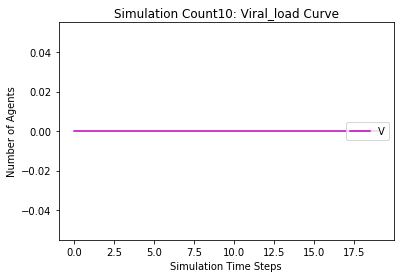

In [10]:
SS,II,RR,VV,TT = [[]],[[]],[[]],[[]],[[]]
for i in range(10):
  j=0
  Node_p=Node.copy()
  Node_n=Node.copy() 
  Agent_p=Agent.copy()
  Agent_n=Agent.copy()
  Sj,Ij,Rj,Vj = Count_SIR_Node(Node_n) 
  #print([Sj,Ij,Rj]) 
  S,I,R,V,T = [],[],[],[],[]
  S.append(Sj)
  I.append(Ij)
  R.append(Rj)
  V.append(Vj)
  T.append(j)

  while Ij > 0 or Vj > 0.01 :
    Node_p,Node_n,Agent_p,Agent_n = random_walk(Graph,GraphN,Node_n,Agent_n,1,1)
    j+=1 
    Sj,Ij,Rj,Vj = Count_SIR_Node(Node_n) 
    S.append(Sj)
    I.append(Ij)
    R.append(Rj)
    V.append(Vj)
    T.append(j)
    
  print(S)
  print(I)
  print(R)
  print(V)
  SS.append(S)
  II.append(I)
  RR.append(R)
  VV.append(V)
  TT.append(T)
  print(SS)
  print(II)
  print(RR)
  print(VV)
  plt.plot(T, S, 'b', T, I, 'r', T, R, 'g',T, V, 'm')
  plt.xlabel('Simulation Time Steps')
  plt.title('Simulation Count-'+str(i+1)+': SIR and Viral_load Curve')
  plt.ylabel('Number of Agents')
  plt.legend(("Susceptible", "Infected", "Recovered", "Viral_load"),loc='center right')
  plt.show()  
  
  plt.plot(T, S, 'b')
  plt.xlabel('Simulation Time Steps')
  plt.title('Simulation Count-'+str(i+1)+': Susceptible Curve')
  plt.ylabel('Number of Agents')
  plt.legend(("Susceptible"),loc='center right')
  plt.show()

  plt.plot(T, I, 'r')
  plt.xlabel('Simulation Time Steps')
  plt.title('Simulation Count-'+str(i+1)+': Infected Curve')
  plt.ylabel('Number of Agents')
  plt.legend(("Infected"),loc='center right')
  plt.show()

  plt.plot(T, R, 'g')
  plt.xlabel('Simulation Time Steps')
  plt.title('Simulation Count-'+str(i+1)+': Recovered Curve')
  plt.ylabel('Number of Agents')
  plt.legend(("Recovered"),loc='center right')
  plt.show()  

  plt.plot(T, V, 'm')
  plt.xlabel('Simulation Time Steps')
  plt.title('Simulation Count'+str(i+1)+': Viral_load Curve')
  plt.ylabel('Number of Agents')
  plt.legend(("Viral_load"),loc='center right')
  plt.show()  

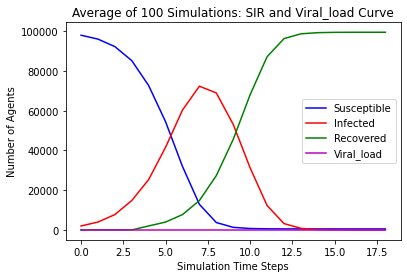

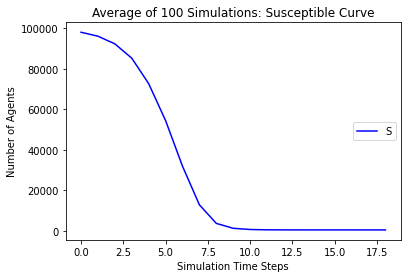

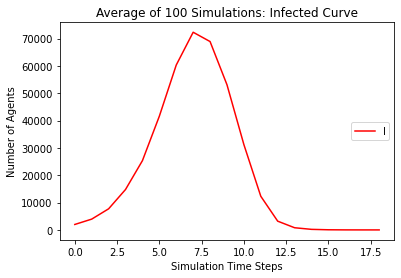

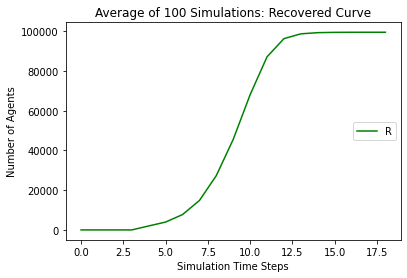

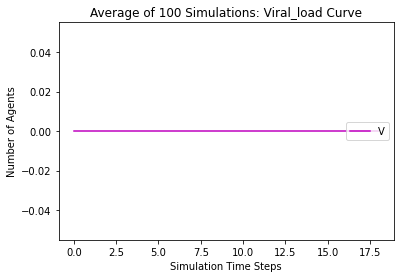

In [11]:
from statistics import mean
SC = SS[1]
IC = II[1]
RC = RR[1]
VT = VV[1]
TC = TT[1]
for i in range(2,10):
  SC = [mean(i) for i in zip(SC,SS[i])] 
  IC = [mean(i) for i in zip(IC,II[i])] 
  RC = [mean(i) for i in zip(RC,RR[i])] 
  VT = [mean(i) for i in zip(VT,VV[i])] 
  TC = [mean(i) for i in zip(TC,TT[i])] 

plt.plot(TC, SC, 'b', TC, IC, 'r', TC, RC, 'g', TC, VT, 'm')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Simulations: SIR and Viral_load Curve')
plt.ylabel('Number of Agents')
plt.legend(("Susceptible", "Infected", "Recovered", "Viral_load"),loc='center right')
plt.show()  
  
plt.plot(TC, SC, 'b')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Simulations: Susceptible Curve')
plt.ylabel('Number of Agents')
plt.legend(("Susceptible"),loc='center right')
plt.show()

plt.plot(TC, IC, 'r')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Simulations: Infected Curve')
plt.ylabel('Number of Agents')
plt.legend(("Infected"),loc='center right')
plt.show()

plt.plot(TC, RC, 'g')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Simulations: Recovered Curve')
plt.ylabel('Number of Agents')
plt.legend(("Recovered"),loc='center right')
plt.show()  

plt.plot(TC, VT, 'm')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Simulations: Viral_load Curve')
plt.ylabel('Number of Agents')
plt.legend(("Viral_load"),loc='center right')
plt.show()  


  
